In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [2]:
# Import data from CSV's
df = pd.read_csv('Resources/food_bev_data.csv')
df.head()

,Line,Consumption Category,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,70,Nondurable goods,2660549,2667298,2674394,2673472,2684923,2686891,2703838,2705901,...,3008558,3021381,3021272,3169119,2755262,2978595,3109915,3134189,3116286,3170807
1,71,Food and beverages purchased for off-premi...,879429,880382,884258,882702,883590,884369,886810,884787,...,987425,984969,981102,1201697,1028276,1050767,1043761,1058238,1045782,1049660
2,72,Food and nonalcoholic beverages purchase...,758255,758743,761143,760391,760844,760881,762501,760588,...,846297,843738,839913,1035444,879610,892912,885363,899938,886682,890498
3,73,Food purchased for off-premises consum...,670298,670911,672565,672575,672796,672519,673834,672420,...,747599,745573,741871,920039,783298,794315,786017,798231,786446,789583
4,74,Cereals and bakery products,131299,131481,130979,130627,130858,130910,131009,131314,...,142791,143562,143129,177724,150935,155017,153845,155114,153090,152942


In [3]:
#Making df just using the Meat & Fruit/Veggie rows & remove everything not 2020
food_df = df.loc[[df.index[7],df.index[18], df.index[19], df.index[20],df.index[21]]]
food_df.keys()
graph_df = food_df.drop(columns=["Line",'2015M01', '2015M02', '2015M03',
       '2015M04', '2015M05', '2015M06', '2015M07', '2015M08', '2015M09',
       '2015M10', '2015M11', '2015M12', '2016M01', '2016M02', '2016M03',
       '2016M04', '2016M05', '2016M06', '2016M07', '2016M08', '2016M09',
       '2016M10', '2016M11', '2016M12', '2017M01', '2017M02', '2017M03',
       '2017M04', '2017M05', '2017M06', '2017M07', '2017M08', '2017M09',
       '2017M10', '2017M11', '2017M12', '2018M01', '2018M02', '2018M03',
       '2018M04', '2018M05', '2018M06', '2018M07', '2018M08', '2018M09',
       '2018M10', '2018M11', '2018M12' ])
graph_df = graph_df.set_index("Consumption Category ")
graph_df



,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
Consumption Category,,,,,,,,,,,,,,,,,,,,,
Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,162487,...,160863,160228,159684,201253,170529,167545,162020,168507,168277,169222
Fresh fruits and vegetables,83285,81046,81457,82412,83093,84110,84757,84883,84974,84823,...,85618,85193,85144,106379,92262,93807,92650,92934,91172,91742
Fruit (fresh),37707,36950,37357,37728,38078,38440,38949,39226,39278,39021,...,39217,39759,39716,49421,42821,43849,43723,43801,42467,43055
Vegetables (fresh),45575,44097,44106,44689,45022,45675,45819,45675,45715,45814,...,46408,45473,45466,56995,49470,50004,49001,49203,48742,48744
Processed fruits and vegetables,30991,29927,30011,30430,30456,30551,30996,31034,30746,30591,...,30499,30639,30674,38355,32704,33378,32978,33136,32600,32502


In [4]:
print(graph_df.index)

Index(['          Meats and poultry', '          Fresh fruits and vegetables',
       '            Fruit (fresh)', '            Vegetables (fresh)',
       '          Processed fruits and vegetables'],
      dtype='object', name='Consumption Category ')


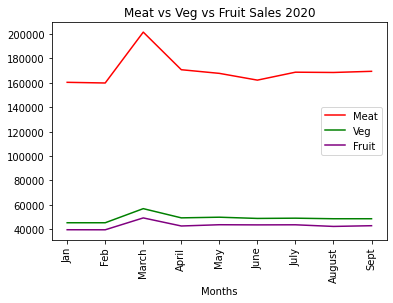

In [5]:
months = graph_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

#graphing meat vs veg vs fruit
meats, = plt.plot(months, graph_df.loc['          Meats and poultry',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Meat")
veg, = plt.plot(months, graph_df.loc['            Vegetables (fresh)',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="green", label="Veg")
fruit, = plt.plot(months, graph_df.loc['            Fruit (fresh)',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="purple", label="Fruit")

# Create a legend for our chart
plt.legend(handles=[meats, veg,fruit], loc="best")
plt.title("Meat vs Veg vs Fruit Sales 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

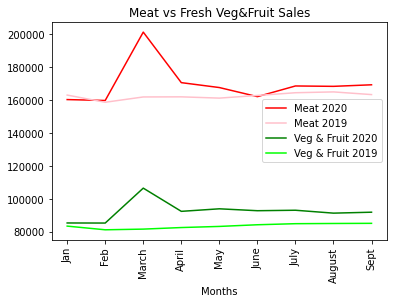

In [7]:
meats20, = plt.plot(months, graph_df.loc['          Meats and poultry',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Meat 2020")
vegfruit20, = plt.plot(months, graph_df.loc['          Fresh fruits and vegetables',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="green", label="Veg & Fruit 2020")

meats19, = plt.plot(months, graph_df.loc['          Meats and poultry',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="pink", label="Meat 2019")
vegfruit19, = plt.plot(months, graph_df.loc['          Fresh fruits and vegetables',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="lime", label="Veg & Fruit 2019")

# Create a legend for our chart
plt.legend(handles=[meats20,meats19, vegfruit20,vegfruit19], loc="best")
plt.title("Meat vs Fresh Veg&Fruit Sales")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

In [38]:
df = pd.read_csv('Resources/nondurable_no_commas.csv')
df.head(25)


,Consumption Category,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Nondurable goods,2660549,2667298,2674394,2673472,2684923,2686891,2703838,2705901,2716496,...,3008558,3021381,3021272,3169119,2755262,2978595,3109915,3134189,3116286,3170807
1,Food and beverages purchased for off-premi...,879429,880382,884258,882702,883590,884369,886810,884787,888291,...,987425,984969,981102,1201697,1028276,1050767,1043761,1058238,1045782,1049660
2,Food and nonalcoholic beverages purchase...,758255,758743,761143,760391,760844,760881,762501,760588,763743,...,846297,843738,839913,1035444,879610,892912,885363,899938,886682,890498
3,Food purchased for off-premises consum...,670298,670911,672565,672575,672796,672519,673834,672420,674656,...,747599,745573,741871,920039,783298,794315,786017,798231,786446,789583
4,Cereals and bakery products,131299,131481,130979,130627,130858,130910,131009,131314,132304,...,142791,143562,143129,177724,150935,155017,153845,155114,153090,152942
5,Cereals,49540,49704,49377,49066,49225,49255,49686,49645,50225,...,55709,55580,55588,70070,60250,60602,59986,60907,60275,59845
6,Bakery products,81775,81794,81616,81571,81644,81667,81346,81687,82105,...,87206,88070,87643,107871,90934,94559,93988,94373,92996,93243
7,Meats and poultry,145926,146435,146401,146889,147351,147076,147497,147801,148351,...,160863,160228,159684,201253,170529,167545,162020,168507,168277,169222
8,Beef and veal,36684,36672,36623,36491,36444,36441,36614,36782,36931,...,40233,40012,40037,50636,42940,39704,37506,40912,42084,42366
9,Pork,29719,30107,30637,31419,31312,31550,31577,31664,31472,...,33692,33455,33071,42022,35885,35800,34319,35492,35601,36054


In [39]:
df['Consumption Category '] = df['Consumption Category '].str.lstrip()
df.head()


,Consumption Category,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Nondurable goods,2660549,2667298,2674394,2673472,2684923,2686891,2703838,2705901,2716496,...,3008558,3021381,3021272,3169119,2755262,2978595,3109915,3134189,3116286,3170807
1,Food and beverages purchased for off-premises ...,879429,880382,884258,882702,883590,884369,886810,884787,888291,...,987425,984969,981102,1201697,1028276,1050767,1043761,1058238,1045782,1049660
2,Food and nonalcoholic beverages purchased for ...,758255,758743,761143,760391,760844,760881,762501,760588,763743,...,846297,843738,839913,1035444,879610,892912,885363,899938,886682,890498
3,Food purchased for off-premises consumption,670298,670911,672565,672575,672796,672519,673834,672420,674656,...,747599,745573,741871,920039,783298,794315,786017,798231,786446,789583
4,Cereals and bakery products,131299,131481,130979,130627,130858,130910,131009,131314,132304,...,142791,143562,143129,177724,150935,155017,153845,155114,153090,152942


In [40]:
df = df.drop(columns=['2015M01', '2015M02', '2015M03',
       '2015M04', '2015M05', '2015M06', '2015M07', '2015M08', '2015M09',
       '2015M10', '2015M11', '2015M12', '2016M01', '2016M02', '2016M03',
       '2016M04', '2016M05', '2016M06', '2016M07', '2016M08', '2016M09',
       '2016M10', '2016M11', '2016M12', '2017M01', '2017M02', '2017M03',
       '2017M04', '2017M05', '2017M06', '2017M07', '2017M08', '2017M09',
       '2017M10', '2017M11', '2017M12', '2018M01', '2018M02', '2018M03',
       '2018M04', '2018M05', '2018M06', '2018M07', '2018M08', '2018M09',
       '2018M10', '2018M11', '2018M12' ])


In [31]:
df = df.set_index('Grocery Consumption Category ')


In [55]:
df.head(25)

,Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Nondurable goods,2963726,2949283,2975588,2991313,2997310,3014418,3024628,3030805,3016226,...,3008558,3021381,3021272,3169119,2755262,2978595,3109915,3134189,3116286,3170807
1,Food and beverages purchased for off-premises ...,979984,957906,971007,977905,977712,984006,993578,994712,986470,...,987425,984969,981102,1201697,1028276,1050767,1043761,1058238,1045782,1049660
2,Food and nonalcoholic beverages purchased for ...,842617,822119,833139,839572,839434,845096,854193,855088,847008,...,846297,843738,839913,1035444,879610,892912,885363,899938,886682,890498
3,Food purchased for off-premises consumption,745251,726939,736766,741926,742057,746589,754571,755346,748128,...,747599,745573,741871,920039,783298,794315,786017,798231,786446,789583
4,Cereals and bakery products,142349,139160,140742,141714,141374,142700,143963,144391,142633,...,142791,143562,143129,177724,150935,155017,153845,155114,153090,152942
5,Cereals,55455,53880,54026,54668,54868,54946,55523,55837,55401,...,55709,55580,55588,70070,60250,60602,59986,60907,60275,59845
6,Bakery products,87008,85364,86766,87116,86604,87818,88511,88636,87335,...,87206,88070,87643,107871,90934,94559,93988,94373,92996,93243
7,Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,...,160863,160228,159684,201253,170529,167545,162020,168507,168277,169222
8,Beef and veal,41271,40408,41109,41227,40973,41636,41865,41988,41339,...,40233,40012,40037,50636,42940,39704,37506,40912,42084,42366
9,Pork,34295,33650,33997,34220,33531,34052,34268,34854,34324,...,33692,33455,33071,42022,35885,35800,34319,35492,35601,36054


In [44]:
meat_df = df.loc[[df.index[7],df.index[8],df.index[9], df.index[10], df.index[11],df.index[12]]]
meat_df

,Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
7,Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,...,160863,160228,159684,201253,170529,167545,162020,168507,168277,169222
8,Beef and veal,41271,40408,41109,41227,40973,41636,41865,41988,41339,...,40233,40012,40037,50636,42940,39704,37506,40912,42084,42366
9,Pork,34295,33650,33997,34220,33531,34052,34268,34854,34324,...,33692,33455,33071,42022,35885,35800,34319,35492,35601,36054
10,Other meats,33082,32053,32807,32722,32734,32890,33064,32994,32827,...,33032,32519,32554,41209,35098,35718,34706,34983,34193,34558
11,Poultry,54542,52678,54112,53920,54074,54335,55391,55266,54998,...,54177,54528,54280,67684,56830,56959,56309,57577,56688,56543
12,Fish and seafood,13586,13216,13567,13808,13676,13909,14027,13986,13882,...,13826,13630,13633,17109,14597,15070,15109,15103,14857,14770


In [45]:
meat_df = meat_df.set_index('Consumption Category ')

In [46]:
meat_df

,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
Consumption Category,,,,,,,,,,,,,,,,,,,,,
Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,162487,...,160863,160228,159684,201253,170529,167545,162020,168507,168277,169222
Beef and veal,41271,40408,41109,41227,40973,41636,41865,41988,41339,40963,...,40233,40012,40037,50636,42940,39704,37506,40912,42084,42366
Pork,34295,33650,33997,34220,33531,34052,34268,34854,34324,34140,...,33692,33455,33071,42022,35885,35800,34319,35492,35601,36054
Other meats,33082,32053,32807,32722,32734,32890,33064,32994,32827,32942,...,33032,32519,32554,41209,35098,35718,34706,34983,34193,34558
Poultry,54542,52678,54112,53920,54074,54335,55391,55266,54998,54681,...,54177,54528,54280,67684,56830,56959,56309,57577,56688,56543
Fish and seafood,13586,13216,13567,13808,13676,13909,14027,13986,13882,13746,...,13826,13630,13633,17109,14597,15070,15109,15103,14857,14770


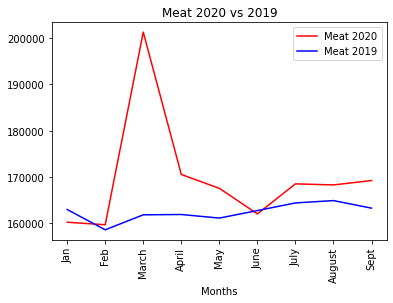

In [47]:
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]
meats20, = plt.plot(months, meat_df.loc['Meats and poultry',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Meat 2020")

meats19, = plt.plot(months, meat_df.loc['Meats and poultry',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Meat 2019")


# Create a legend for our chart
plt.legend(handles=[meats20,meats19], loc="best")
plt.title("Meat 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

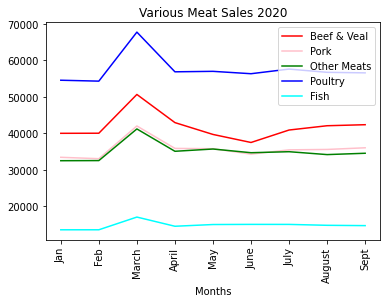

In [49]:
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]
beefveal20, = plt.plot(months, meat_df.loc['Beef and veal',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Beef & Veal")
pork20, = plt.plot(months, meat_df.loc['Pork',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="pink", label="Pork")
other20, = plt.plot(months, meat_df.loc['Other meats',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="green", label="Other Meats")
poultry20, = plt.plot(months, meat_df.loc['Poultry',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="blue", label="Poultry")
fish20, = plt.plot(months, meat_df.loc['Fish and seafood',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="cyan", label="Fish")

# Create a legend for our chart
plt.legend(handles=[beefveal20, pork20, other20,poultry20,fish20], loc="best")
plt.title("Various Meat Sales 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

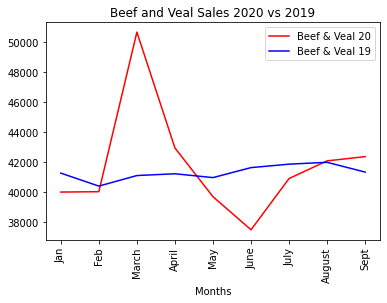

In [50]:
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]
beefveal20, = plt.plot(months, meat_df.loc['Beef and veal',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Beef & Veal 20")

beefveal19, = plt.plot(months, meat_df.loc['Beef and veal',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Beef & Veal 19")


# Create a legend for our chart
plt.legend(handles=[beefveal20, beefveal19], loc="best")
plt.title("Beef and Veal Sales 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
#In April, there were a few outbreaks in meat packing plants, which lead to plant closures and a decline
#in amount of meat processed and a rise in cost. In May, some stores, like Costco, began limiting customers
#amount of fresh meat they could purchase to a max of 3. This definitely seems to have affected beef
#sales, and pork at least a bit, but the chicken sales seem barely affected

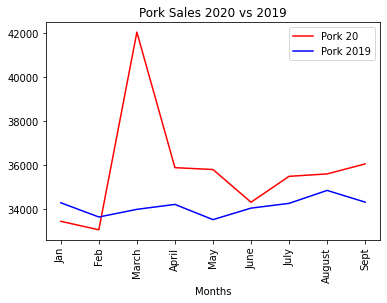

In [51]:
pork20, = plt.plot(months, meat_df.loc['Pork',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Pork 20")

pork19, = plt.plot(months, meat_df.loc['Pork',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Pork 2019")

# Create a legend for our chart
plt.legend(handles=[pork20,pork19], loc="best")
plt.title("Pork Sales 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

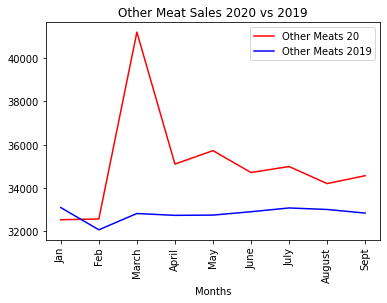

In [52]:
other20, = plt.plot(months, meat_df.loc['Other meats',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Other Meats 20")

other19, = plt.plot(months, meat_df.loc['Other meats',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Other Meats 2019")

# Create a legend for our chart
plt.legend(handles=[other20, other19], loc="best")
plt.title("Other Meat Sales 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

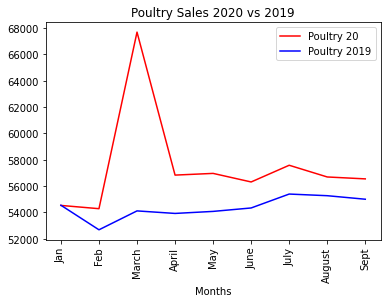

In [53]:
poultry20, = plt.plot(months, meat_df.loc['Poultry',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Poultry 20")

poultry19, = plt.plot(months, meat_df.loc['Poultry',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Poultry 2019")

# Create a legend for our chart
plt.legend(handles=[poultry20,poultry19], loc="best")
plt.title("Poultry Sales 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

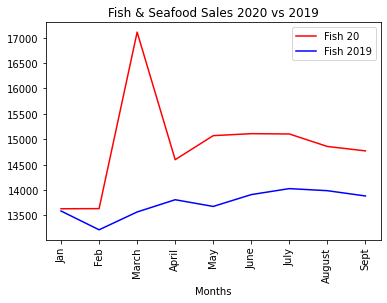

In [54]:
fish20, = plt.plot(months, meat_df.loc['Fish and seafood',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Fish 20")

fish19, = plt.plot(months, meat_df.loc['Fish and seafood',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Fish 2019")

# Create a legend for our chart
plt.legend(handles=[fish20,fish19], loc="best")
plt.title("Fish & Seafood Sales 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()